# Ordmoln

In [1]:
import pandas as pd

nyheter = pd.read_csv('https://kodanka.fi/nyheter.csv')
nyhetsrubriker = nyheter['Rubrik']
print(nyhetsrubriker.head())

0               Ted & Kaj: Din mamma var en sköldpadda
1                        Senaste nytt om coronaviruset
2    Jobb som bärplockare är ökänt för dåliga arbet...
3    Preliminära uppgifter: Förlängt Putinstyre i s...
4    Kommentar: Så länge ryssarna sväljer maktfullk...
Name: Rubrik, dtype: object


In [2]:
stoppord = pd.read_csv('https://kodanka.fi/stoppord.txt', squeeze=True)
print(stoppord.head())

0    adertonde
1         adjö
2       aldrig
3         alla
4        allas
Name: aderton, dtype: object


In [3]:
from wordcloud import WordCloud

ordmoln = WordCloud(stopwords=set(stoppord), 
                    width=1000, 
                    height=1000, 
                    background_color='white')

In [4]:
ordmoln = ordmoln.generate((' ').join(nyhetsrubriker))

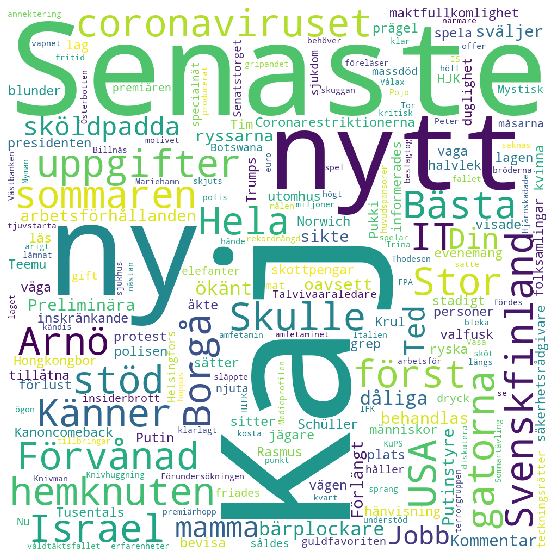

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(ordmoln)
plt.axis('off')
plt.show()

In [7]:
import requests
from io import BytesIO
from PIL import Image

png = requests.get('https://kodanka.fi/skugga.png')
skugga = Image.open(BytesIO(png.content))

<img src="https://kodanka.fi/skugga.png" width="500">

In [8]:
import numpy as np

mask = np.array(skugga)
print(mask[0])

[[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 ...
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]]


In [10]:
ordmoln = WordCloud(stopwords=set(stoppord), 
                    width=1000, 
                    height=1000, 
                    background_color=None,
                    mode='RGBA',
                    mask=mask)

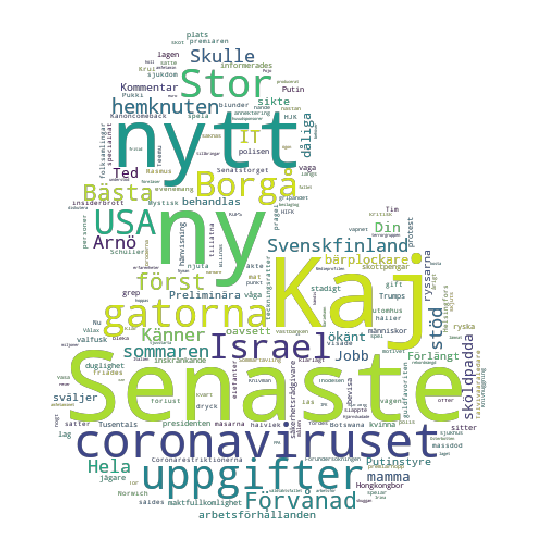

In [11]:
ordmoln = ordmoln.generate((' ').join(nyhetsrubriker))
plt.figure(figsize=(10, 10))
plt.imshow(ordmoln)
plt.axis('off')
plt.show()

```
import pandas as pd
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nyheter = pd.read_csv('https://kodanka.fi/nyheter.csv')
nyhetsrubriker = nyheter['Rubrik']

stoppord = pd.read_csv('https://kodanka.fi/stoppord.txt', squeeze=True)

png = requests.get('https://kodanka.fi/skugga.png')
skugga = Image.open(BytesIO(png.content))
mask = np.array(skugga)

ordmoln = WordCloud(stopwords=set(stoppord), 
                    width=1000, 
                    height=1000, 
                    background_color=None,
                    mode='RGBA',
                    mask=mask)
ordmoln = ordmoln.generate((' ').join(nyhetsrubriker))
plt.figure(figsize=(10, 10))
plt.imshow(ordmoln)
plt.axis('off')
plt.show()
```